In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import pandas as pd

## 동영상을 frame 단위로 쪼개서 저장하기
- 이미지를 중앙 기준으로 상하 30% 씩 자른 후 가로로 500px 기준으로도 자르기
    - 양쪽 140px 씩 버려서 가로가 500에 딱 맞아떨어지도록 함

In [117]:
path = "./data/mp4_train/*"
vid_list = glob(path)

for vid_path in tqdm(vid_list) :
    cap = cv2.VideoCapture(vid_path)
    cnt = 0
    first_15f_chk = 0
    while(cap.isOpened()) :
        ret, frame = cap.read()
        
        
        if ret and first_15f_chk > 14 :
            vid_path = vid_path.replace("/mp4_train\\", "\\new_train\\").replace(".mp4","_")
            
            h, w = frame.shape[:2]
            
            upper = int(h/2) - int(h * 0.3)
            bottom = int(h/2) + int(h * 0.3)
            frame_1 = frame[upper:bottom, 140:640, :]
            cv2.imwrite(vid_path+str(cnt).zfill(3)+".jpg", frame_1)
            
            frame_2 = frame[upper:bottom, 640:1140, :]
            cv2.imwrite(vid_path+str(cnt + 1).zfill(3)+".jpg", frame_2)
            
#             frame_3 = frame[upper:bottom, 800:1200, :]
#             cv2.imwrite(vid_path+str(cnt + 2)+".jpg", frame)
            
            cnt += 2
            
        elif first_15f_chk < 15 : 
            first_15f_chk += 1
        
        else :
            break
            
            
        
    cap.release()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2698/2698 [19:59<00:00,  2.25it/s]


## label 간 비율 구하기

In [10]:
path = "./data/train.csv"
label_csv = pd.read_csv(path)
label_csv

,sample_id,video_path,label
0,TRAIN_0000,./train/TRAIN_0000.mp4,7
1,TRAIN_0001,./train/TRAIN_0001.mp4,7
2,TRAIN_0002,./train/TRAIN_0002.mp4,0
3,TRAIN_0003,./train/TRAIN_0003.mp4,0
4,TRAIN_0004,./train/TRAIN_0004.mp4,1
...,...,...,...
2693,TRAIN_2693,./train/TRAIN_2693.mp4,3
2694,TRAIN_2694,./train/TRAIN_2694.mp4,5
2695,TRAIN_2695,./train/TRAIN_2695.mp4,0
2696,TRAIN_2696,./train/TRAIN_2696.mp4,0


In [37]:
df = pd.read_csv('./data/train.csv')
sampled = np.random.choice(len(df), int(len(df) * 0.2))

In [38]:
sampled = df['sample_id'][sampled].values.tolist()
sampled

['TRAIN_0751',
 'TRAIN_0922',
 'TRAIN_2366',
 'TRAIN_2637',
 'TRAIN_1118',
 'TRAIN_1294',
 'TRAIN_0450',
 'TRAIN_0629',
 'TRAIN_2216',
 'TRAIN_2420',
 'TRAIN_2237',
 'TRAIN_0690',
 'TRAIN_0861',
 'TRAIN_0751',
 'TRAIN_1903',
 'TRAIN_0545',
 'TRAIN_0748',
 'TRAIN_1410',
 'TRAIN_2414',
 'TRAIN_2558',
 'TRAIN_2104',
 'TRAIN_2182',
 'TRAIN_2160',
 'TRAIN_0285',
 'TRAIN_2039',
 'TRAIN_1773',
 'TRAIN_1294',
 'TRAIN_2199',
 'TRAIN_1519',
 'TRAIN_0029',
 'TRAIN_1738',
 'TRAIN_2181',
 'TRAIN_0367',
 'TRAIN_2396',
 'TRAIN_0377',
 'TRAIN_0221',
 'TRAIN_1844',
 'TRAIN_0373',
 'TRAIN_1415',
 'TRAIN_0062',
 'TRAIN_0772',
 'TRAIN_0139',
 'TRAIN_1359',
 'TRAIN_2189',
 'TRAIN_0165',
 'TRAIN_2401',
 'TRAIN_2013',
 'TRAIN_2295',
 'TRAIN_0732',
 'TRAIN_2316',
 'TRAIN_1645',
 'TRAIN_1574',
 'TRAIN_1804',
 'TRAIN_1200',
 'TRAIN_2348',
 'TRAIN_1533',
 'TRAIN_1124',
 'TRAIN_1421',
 'TRAIN_0033',
 'TRAIN_0604',
 'TRAIN_2323',
 'TRAIN_1036',
 'TRAIN_2681',
 'TRAIN_1021',
 'TRAIN_0518',
 'TRAIN_0494',
 'TRAIN_10

In [39]:
df = pd.read_csv('./data/50frame_train.csv')
# print("_".join(df['sample_id'][0].split("_")[:2]))

train_list = []
valid_list = []
for idx, si in enumerate(df['sample_id']) :
    if "_".join(si.split("_")[:2]) in sampled :
        train_list.append(idx)
    else :
        valid_list.append(idx)
    
    

In [45]:
df.iloc[train_list]

,sample_id,img_path,label
200,TRAIN_0004_000,./data/50frame_train\TRAIN_0004_000.jpg,1
201,TRAIN_0004_001,./data/50frame_train\TRAIN_0004_001.jpg,1
202,TRAIN_0004_002,./data/50frame_train\TRAIN_0004_002.jpg,1
203,TRAIN_0004_003,./data/50frame_train\TRAIN_0004_003.jpg,1
204,TRAIN_0004_004,./data/50frame_train\TRAIN_0004_004.jpg,1
...,...,...,...
134295,TRAIN_2685_045,./data/50frame_train\TRAIN_2685_045.jpg,8
134296,TRAIN_2685_046,./data/50frame_train\TRAIN_2685_046.jpg,8
134297,TRAIN_2685_047,./data/50frame_train\TRAIN_2685_047.jpg,8
134298,TRAIN_2685_048,./data/50frame_train\TRAIN_2685_048.jpg,8


In [50]:
df.iloc[valid_list]

,sample_id,img_path,label
0,TRAIN_0000_000,./data/50frame_train\TRAIN_0000_000.jpg,7
1,TRAIN_0000_001,./data/50frame_train\TRAIN_0000_001.jpg,7
2,TRAIN_0000_002,./data/50frame_train\TRAIN_0000_002.jpg,7
3,TRAIN_0000_003,./data/50frame_train\TRAIN_0000_003.jpg,7
4,TRAIN_0000_004,./data/50frame_train\TRAIN_0000_004.jpg,7
...,...,...,...
134895,TRAIN_2697_045,./data/50frame_train\TRAIN_2697_045.jpg,0
134896,TRAIN_2697_046,./data/50frame_train\TRAIN_2697_046.jpg,0
134897,TRAIN_2697_047,./data/50frame_train\TRAIN_2697_047.jpg,0
134898,TRAIN_2697_048,./data/50frame_train\TRAIN_2697_048.jpg,0


In [46]:
df.iloc[train_list].reset_index(drop=True)

,sample_id,img_path,label
0,TRAIN_0004_000,./data/50frame_train\TRAIN_0004_000.jpg,1
1,TRAIN_0004_001,./data/50frame_train\TRAIN_0004_001.jpg,1
2,TRAIN_0004_002,./data/50frame_train\TRAIN_0004_002.jpg,1
3,TRAIN_0004_003,./data/50frame_train\TRAIN_0004_003.jpg,1
4,TRAIN_0004_004,./data/50frame_train\TRAIN_0004_004.jpg,1
...,...,...,...
24045,TRAIN_2685_045,./data/50frame_train\TRAIN_2685_045.jpg,8
24046,TRAIN_2685_046,./data/50frame_train\TRAIN_2685_046.jpg,8
24047,TRAIN_2685_047,./data/50frame_train\TRAIN_2685_047.jpg,8
24048,TRAIN_2685_048,./data/50frame_train\TRAIN_2685_048.jpg,8


In [49]:
df['label'].iloc[train_list].tolist()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [23]:
df = pd.read_csv('./data/50frame_train.csv')
z = ['TRAIN_0000']
df['img_path'][df['sample_id'][:].split("_")[:2] in z]

AttributeError: 'Series' object has no attribute 'split'

{0: 1783,
 1: 318,
 2: 51,
 3: 78,
 4: 13,
 5: 28,
 6: 3,
 7: 317,
 8: 30,
 9: 34,
 10: 4,
 11: 33,
 12: 6}

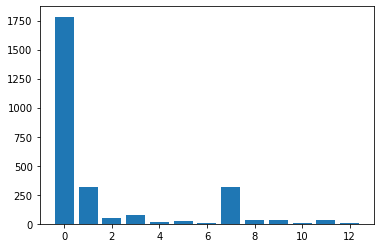

In [30]:
label_count = {i : label_csv[label_csv['label']==i].count()[1] for i in list(set(label_csv['label'].tolist()))}

plt.bar(label_count.keys(), label_count.values())
display(label_count)

## 이미지 중간 부분 크롭하여 시각화
- 이미지 중간 기준 위로 10% 아래로 20 % 크롭

In [40]:
path = "./data/train/*.jpg"
img_list = glob(path)
new_img_list = np.array(img_list)[np.random.choice(len(img_list), 10, replace=False)].tolist()


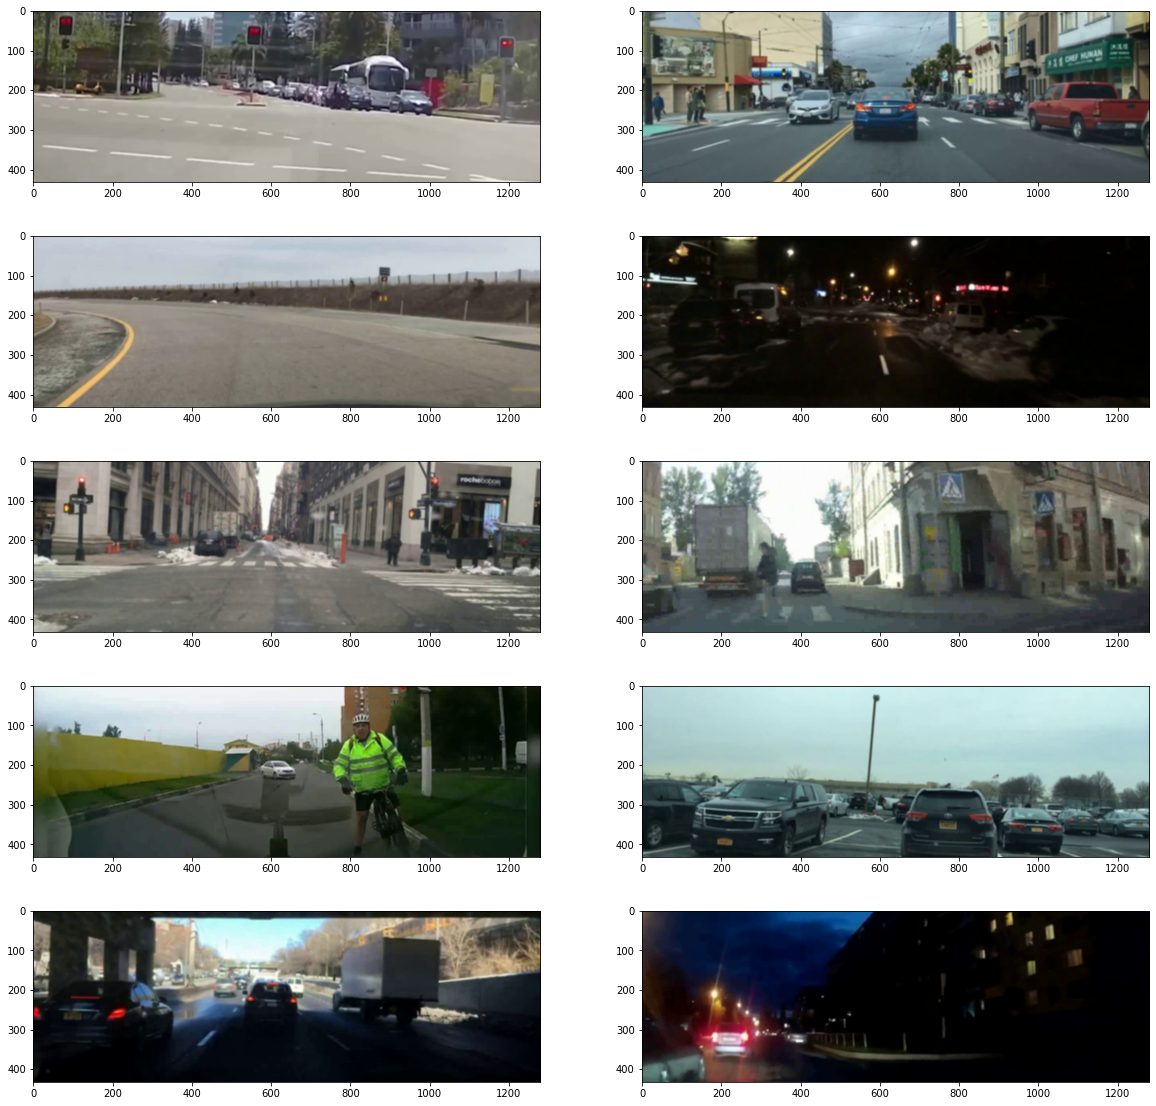

In [41]:
f, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()

for idx, p in enumerate(new_img_list) :
    img = cv2.imread(p)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    
    upper = int(h/2) - int(h * 0.3)
    bottom = int(h/2) + int(h * 0.3)
    
    img = img[upper:bottom, :, :]
    
    axs[idx].imshow(img)

plt.show()
    

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
path = R"C:\Users\quhb2\Documents\git\toy\car_crash_analyze\data\new_train.csv"
df = pd.read_csv(path)

In [7]:
df.head()

,sample_id,img_path,label
0,TRAIN_0000_000,./data/new_train\TRAIN_0000_000.jpg,7
1,TRAIN_0000_001,./data/new_train\TRAIN_0000_001.jpg,7
2,TRAIN_0000_002,./data/new_train\TRAIN_0000_002.jpg,7
3,TRAIN_0000_003,./data/new_train\TRAIN_0000_003.jpg,7
4,TRAIN_0000_004,./data/new_train\TRAIN_0000_004.jpg,7


In [13]:

train_df, val_df, train_labels, val_labels = train_test_split(
        df.drop(columns=['sample_id']),
        df['label'],
        test_size=0.2,
        random_state=2455
    )

In [14]:
train_df

,img_path,label
168080,./data/new_train\TRAIN_2401_010.jpg,1
73708,./data/new_train\TRAIN_1052_068.jpg,7
79368,./data/new_train\TRAIN_1133_058.jpg,11
70507,./data/new_train\TRAIN_1007_017.jpg,1
41610,./data/new_train\TRAIN_0594_030.jpg,1
...,...,...
179393,./data/new_train\TRAIN_2562_053.jpg,0
109868,./data/new_train\TRAIN_1569_038.jpg,0
182992,./data/new_train\TRAIN_2614_012.jpg,0
26480,./data/new_train\TRAIN_0378_020.jpg,0


## Test 이미지 frame 단위로 저장

In [25]:
path = "./data/test/*"
vid_list = glob(path)

for vid_path in tqdm(vid_list) :
    cap = cv2.VideoCapture(vid_path)
    cnt = 0
    first_15f_chk = 0
    while(cap.isOpened()) :
        ret, frame = cap.read()
        
        if ret:
            vid_path = vid_path.replace("/test\\", "\\new_test\\").replace(".mp4","_")
#             print(vid_path)
            cv2.imwrite(vid_path+str(cnt).zfill(3)+".jpg", frame)
            
            cnt += 1
        
        else :
            break
            
            
        
    cap.release()

100%|██████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [16:35<00:00,  1.81it/s]


## frame 크롭한 이미지 기준으로 새로운 csv 만들기

In [30]:
path = "./data/train.csv"
label_csv = pd.read_csv(path)

path = "./data/train/*.jpg"
img_list = glob(path)

In [31]:
new_label_csv = {
    'sample_id' : [],
    'img_path' : [],
    'label' : []
}

for img_path in tqdm(img_list) :
    ori_sample_id = '_'.join(os.path.basename(img_path).split('_')[:2])
    sample_id = os.path.basename(img_path).replace(".jpg","")
    
    new_label_csv['label'].append(label_csv[label_csv['sample_id']==ori_sample_id]['label'].values[0])
    new_label_csv['img_path'].append(img_path)
    new_label_csv['sample_id'].append(sample_id)
    
new_label_df = pd.DataFrame(new_label_csv)
new_label_df
new_label_df.to_csv('./data/50frame_train.csv',index=False)

100%|████████████████████████████████████████████████████████████████████████████████| 134900/134900 [00:38<00:00, 3525.30it/s]


In [29]:
path = "./data/train.csv"
label_csv = pd.read_csv(path)

path = "./data/new_train/*.jpg"
img_list = glob(path)

In [119]:
label_csv

,sample_id,video_path,label
0,TRAIN_0000,./train/TRAIN_0000.mp4,7
1,TRAIN_0001,./train/TRAIN_0001.mp4,7
2,TRAIN_0002,./train/TRAIN_0002.mp4,0
3,TRAIN_0003,./train/TRAIN_0003.mp4,0
4,TRAIN_0004,./train/TRAIN_0004.mp4,1
...,...,...,...
2693,TRAIN_2693,./train/TRAIN_2693.mp4,3
2694,TRAIN_2694,./train/TRAIN_2694.mp4,5
2695,TRAIN_2695,./train/TRAIN_2695.mp4,0
2696,TRAIN_2696,./train/TRAIN_2696.mp4,0


In [149]:
new_label_csv = {
    'sample_id' : [],
    'img_path' : [],
    'label' : []
}

for img_path in tqdm(img_list) :
    ori_sample_id = '_'.join(os.path.basename(img_path).split('_')[:2])
    sample_id = os.path.basename(img_path).replace(".jpg","")
    
    new_label_csv['label'].append(label_csv[label_csv['sample_id']==ori_sample_id]['label'].values[0])
    new_label_csv['img_path'].append(img_path)
    new_label_csv['sample_id'].append(sample_id)
    
new_label_df = pd.DataFrame(new_label_csv)
new_label_df
new_label_df.to_csv('./data/new_train.csv',index=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188860/188860 [00:53<00:00, 3509.47it/s]


In [7]:
p = "./data/50frame_train.csv"

df = pd.read_csv(p)

pl = []
for path in df['img_path'] : 
    pl.append(path.replace('/train\\', '/50frame_train\\'))
    
df['img_path'] = pl

df

,sample_id,img_path,label
0,TRAIN_0000_000,./data/50frame_train\TRAIN_0000_000.jpg,7
1,TRAIN_0000_001,./data/50frame_train\TRAIN_0000_001.jpg,7
2,TRAIN_0000_002,./data/50frame_train\TRAIN_0000_002.jpg,7
3,TRAIN_0000_003,./data/50frame_train\TRAIN_0000_003.jpg,7
4,TRAIN_0000_004,./data/50frame_train\TRAIN_0000_004.jpg,7
...,...,...,...
134895,TRAIN_2697_045,./data/50frame_train\TRAIN_2697_045.jpg,0
134896,TRAIN_2697_046,./data/50frame_train\TRAIN_2697_046.jpg,0
134897,TRAIN_2697_047,./data/50frame_train\TRAIN_2697_047.jpg,0
134898,TRAIN_2697_048,./data/50frame_train\TRAIN_2697_048.jpg,0


In [9]:
df.to_csv(p, index=False)